# Part 2

### 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set folder path

path = r'C:\Users\shyro\OneDrive\Documents\Instacart Basket Analysis'

In [84]:
# Import orders_products_all_final.pkl

df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_orders_products_all_final.pkl'))

In [85]:
df_final.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours_of_day', 'max_order', 'loyalty_flag',
       'avg_prices', 'spending_flag', 'median_freq', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', 'region', 'activity_flag', 'age_flag',
       'income_flag', 'Type', 'dependant_flag'],
      dtype='object')

In [6]:
df_final.shape

(32404859, 38)

#### 1.) What the busiest days of the week and hours of the day are (i.e., the days and times with the most orders)?

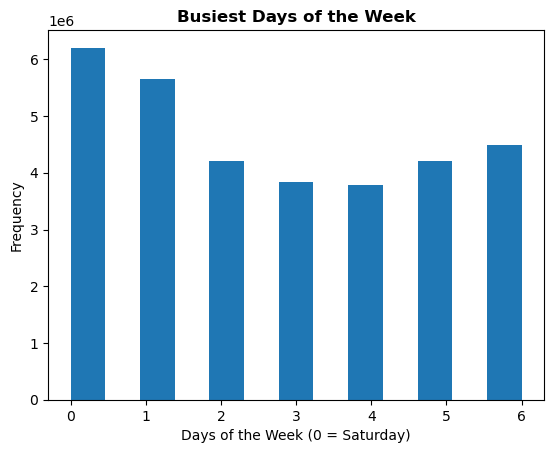

In [7]:
# create a bar chart for the busiest day of the week

busiest_days_bar = df_final['orders_day_of_week'].plot.hist(bins = 13)
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Days of the Week (0 = Saturday)')
plt.show()

#### Saturdays and Sundays (weekends) are the busiest days of the week.

#### 1.1 Part of the Day flag

In [9]:
df_final.loc[(df_final['order_hour_of_day'] >= 5) & (df_final['order_hour_of_day'] <= 12), 'Part_Day'] = 'Morning' 

In [10]:
df_final.loc[(df_final['order_hour_of_day'] >= 13 ) & (df_final['order_hour_of_day'] <= 17), 'Part_Day'] = 'Afternoon' 

In [11]:
df_final.loc[(df_final['order_hour_of_day'] >= 18 ) & (df_final['order_hour_of_day'] <= 21), 'Part_Day'] = 'Evening' 

In [14]:
df_final.loc[(df_final['order_hour_of_day'] >= 22 ) | (df_final['order_hour_of_day'] < 5), 'Part_Day'] = 'Night' 

In [15]:
df_final['Part_Day'].value_counts(dropna = False)

Morning      13558261
Afternoon    12635090
Evening       4666600
Night         1544908
Name: Part_Day, dtype: int64

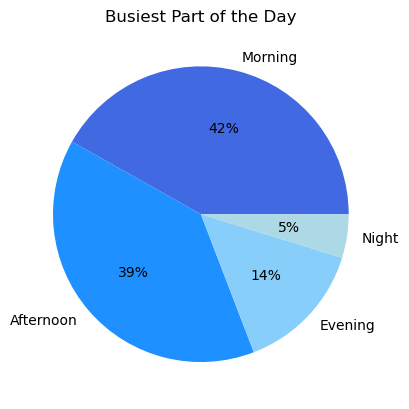

In [18]:
# creating a pie chart of the "Part_Day"” column

part_day_pie = df_final['Part_Day'].value_counts().plot.pie(title ='Busiest Part of the Day', label = '', colors = ['royalblue','dodgerblue','lightskyblue','lightblue'], autopct=('%1.f%%'))

#### Busiest Hour of the Day

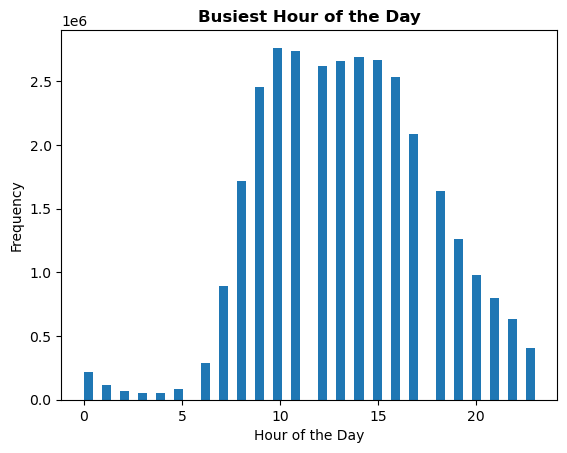

In [19]:
# Create histogram of the "order_hour_of_day" column

busiest_hours_hist = df_final['order_hour_of_day'].plot.hist(bins = 50)
plt.title('Busiest Hour of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

#### 2.) What part of the day do people spend the most money?

In [20]:
#Total price spent according to the part of the day

busiest_part_price = df_final.groupby('Part_Day').agg({'prices' : ['sum']})
busiest_part_price = busiest_part_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_part_price

,prices
,sum
Part_Day,
Morning,163180014.9
Afternoon,153041059.1
Evening,55538887.9
Night,16457560.7


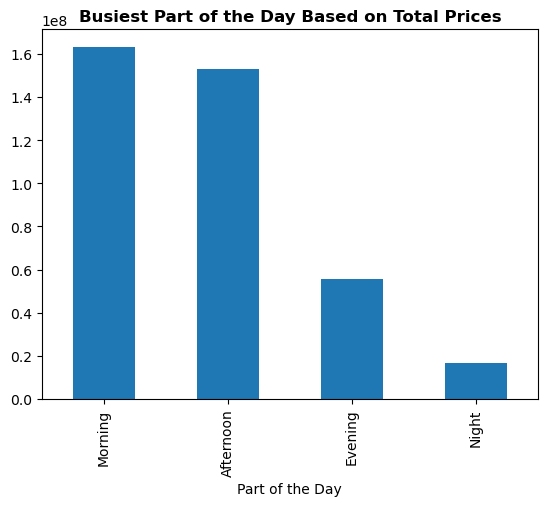

In [21]:
# Creating bar chart for busiest part of the day based on sum of prices

busiest_part_price_bar = busiest_part_price.plot.bar(legend = None)
plt.title('Busiest Part of the Day Based on Total Prices', fontweight = 'bold')
plt.xlabel('Part of the Day')
plt.show()

In [22]:
# total prices by department during the Morning part of the day

busiest_part_dept = df_final[df_orders_products_all['Part_Day'] == 'Morning']

In [23]:
busiest_part_dept['department_id'].value_counts(dropna = False)

4     3972560
16    2307246
19    1238473
7     1151804
1      858939
13     774404
3      491634
15     441834
20     432483
9      348080
17     315264
14     304915
12     290804
18     183121
11     182714
6      108936
5       59210
8       38111
21      28449
2       14691
10      14589
Name: department_id, dtype: int64

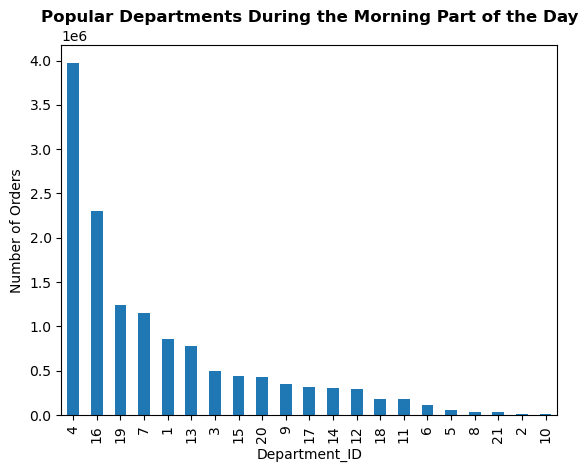

In [24]:
# Creating bar chart for department_id during the morning part of the day

dept_count = busiest_part_dept['department_id'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Popular Departments During the Morning Part of the Day', fontweight='bold')
plt.xlabel('Department_ID')
plt.ylabel('Number of Orders')
plt.show()

#### Produce and eggs were the most popular departments ordered during the Morning part of the day.

#### 3.) What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

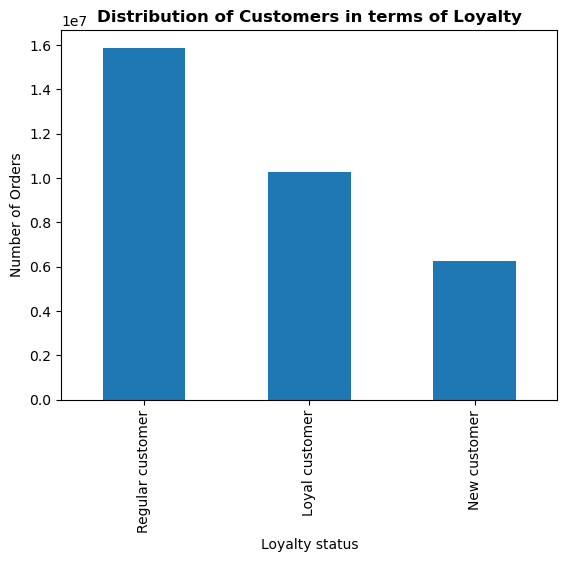

In [25]:
# Create a bar chart from the loyalty_flag column

loyalty_bar = df_final['loyalty_flag'].value_counts().plot.bar()
plt.title('Distribution of Customers in terms of Loyalty', fontweight='bold')
plt.xlabel('Loyalty status')
plt.ylabel('Number of Orders')
plt.show()

#### 4.) Are there differences in ordering habits based on a customer’s loyalty status?

In [26]:
df_final['frequency_flag'].value_counts(dropna = False)

Non-frequent customer    24487186
Regular customer          6533511
Frequent customer         1384157
NaN                             5
Name: frequency_flag, dtype: int64

In [29]:
loyalty_freq = pd.crosstab(df_final['loyalty_flag'], df_final['frequency_flag'], dropna = False)

In [30]:
loyalty_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,699012,5331038,4254043
New customer,351135,5095570,797280
Regular customer,334010,14060578,1482188


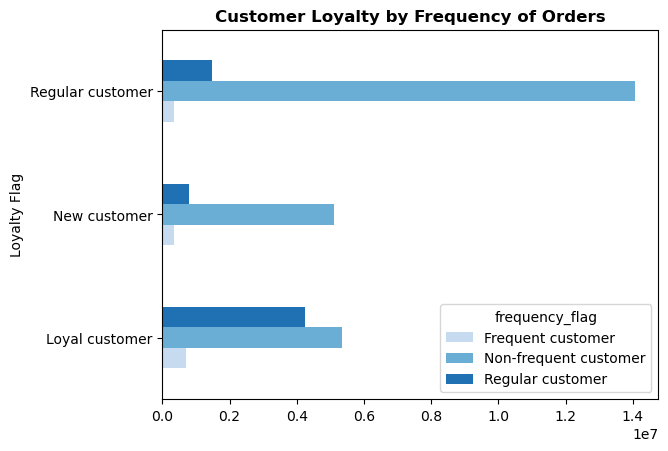

In [31]:
# create a bar chart of customer loyalty by frequency of orders

loyalty_freq_bar = loyalty_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Customer Loyalty by Frequency of Orders', fontweight = 'bold')
plt.ylabel('Loyalty Flag')
plt.show()

#### The frequency rates regardless of their loyalty is low. The loyal customers shop the most frequent. 

#### 4.) Is there a connection between age and family status in terms of ordering habits?

In [33]:
# create crosstab between age_flag and frequency_flag

age_freq = pd.crosstab(df_final['age_flag'], df_final['frequency_flag'], dropna = False)

In [34]:
age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_flag,,,
Adult,395741,7304313,1944841
Middle-Age,329644,5767899,1549977
Old-Age,483031,8358181,2226038
Young Adult,175741,3056793,812655


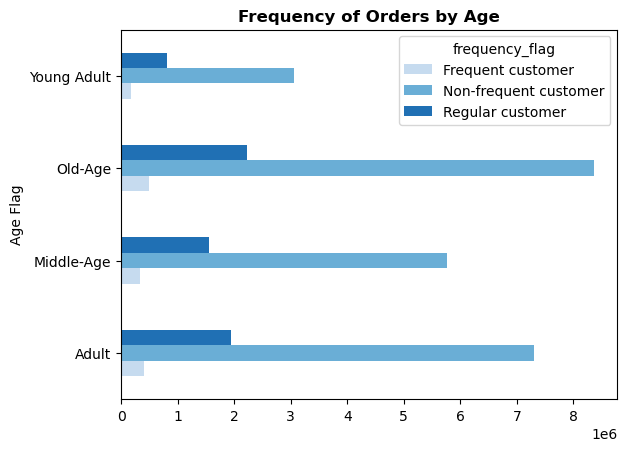

In [38]:
# create a bar chart of age_flag and frequency_flag

age_freq_bar = age_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Frequency of Orders by Age', fontweight = 'bold')
plt.ylabel('Age Flag')
plt.show()

#### Old age customers have the most frequent customers

In [70]:
# create crosstab between dependant_flag and frequency_flag

dependant_freq = pd.crosstab(df_final['dependant_flag'], df_final['frequency_flag'], dropna = False)

In [43]:
dependant_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
dependant_flag,,,
No Children,364609,6107006,1625888
Parent,1019548,18380180,4907623


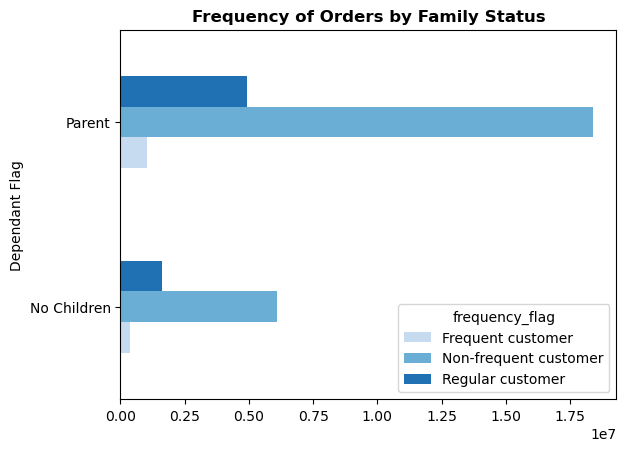

In [45]:
# create a bar chart of dependant_flag and frequency_flag

dependant_freq_bar = dependant_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Frequency of Orders by Family Status', fontweight = 'bold')
plt.ylabel('Dependant Flag')
plt.show()

#### Customers with children ordered the most. 

In [74]:
# create crosstab between age_flag and department_id

age_dept = pd.crosstab(df_final['department_id'], df_final['age_flag'], dropna = False)

In [75]:
age_dept

age_flag,Adult,Middle-Age,Old-Age,Young Adult
department_id,,,,
1,658348,528811,767609,279975
2,10730,8643,12251,4667
3,349788,276194,400020,146426
4,2832448,2228640,3240599,1177604
5,44890,37731,50664,20411
6,80649,63537,91030,34037
7,789244,642084,923708,333087
8,28324,22704,33393,13295
9,256969,204647,295202,109809


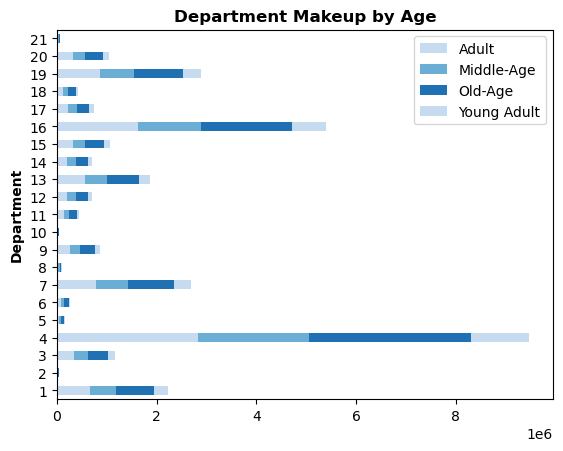

In [77]:
#stacked bar chart of age group and department

age_dept_bar = age_dept.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='upper right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Department Makeup by Age', fontweight = 'bold')
plt.show()

In [78]:
# create crosstab between age_flag and department_id

dependant_dept = pd.crosstab(df_final['department_id'], df_final['dependant_flag'], dropna = False)

In [79]:
dependant_dept

dependant_flag,No Children,Parent
department_id,,
1,557160,1677583
2,9175,27116
3,294405,878023
4,2375445,7103846
5,39118,114578
6,67713,201540
7,674442,2013681
8,24583,73133
9,215262,651365


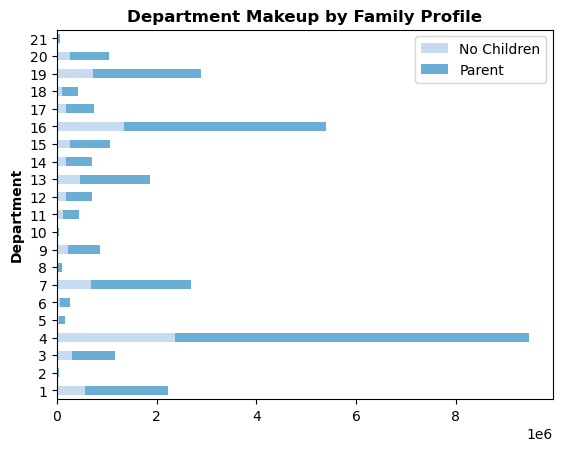

In [80]:
#stacked bar chart of dependant_falg and department

dependant_dept_bar = dependant_dept.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='upper right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Department Makeup by Family Profile', fontweight = 'bold')
plt.show()

In [86]:
# export visualizations

busiest_days_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_days_bar.png'))

In [87]:
part_day_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_part_day_pie.png'))

In [88]:
busiest_hours_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [89]:
busiest_part_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_part_price_bar.png'))

In [90]:
busiest_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_dept_bar.png'))

In [91]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

In [93]:
loyalty_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_freq_bar.png'))

In [94]:
age_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_freq_bar.png'))

In [95]:
dependant_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_freq_bar.png'))

In [96]:
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dept_bar.png'))

In [97]:
dependant_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_dept_bar.png'))